In [65]:
%load_ext autoreload
%autoreload 2

import torch as t

import matplotlib.pyplot as plt

from gninvert.rule_discovery import *
from gninvert.gns import *
from gninvert.graph_compare import model_compare
from gninvert.dtree import *
from gninvert.hyperparamsearch import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
get_TrainingData(MultiDiffusionGN([0.1,0.1]), big=True)

<gninvert.data_generation.TrainingData, 75 train size / 25 validation size / shuffle True>

In [17]:
diff_gn1 = SingleDiffusionGN(
    diffusion_constant=0.1
)
diff_gn2 = MultiDiffusionGN(
    diffusion_constants=[0.1, 0.1]
)
act_inh_gn_simple = ActivatorInhibitorGN(
    act_diff_const = 0.1,
    inh_diff_const = 0.05,
    growth_const = 0.05
)
act_inh_gn_full = FullActInhGN(
    spatial_const = 10,
    temporal_const=0.01,
    growth_alpha=10,
    growth_rho=1,
    growth_scale=0.05,
    reaction_const=0.2,
    reference_conc=2
)

In [50]:
hpres1 = t.load('runs/act_inh_run1/hpsearch')
hpres = t.load('models/bighpsearch')

In [54]:
type(hpres1[0])

dict

In [55]:
type(hpres[0])

dict

In [64]:
get_hyperparam_dtree(hpres1,
                    eq_threshold=1)

<<<DTREE on <ATTRIBUTE loss_func taking values (L1Loss(), MSELoss())
  --(L1Loss())-->
  <<<DTREE on <ATTRIBUTE 3 taking values ([14, 14, 14], [36, 36], [512])
    --((14, 14, 14))-->
    <<<DTREE on <ATTRIBUTE 4 taking values (<class 'torch.nn.modules.activation.GELU'>, <class 'torch.nn.modules.activation.Sigmoid'>)
      --(<class 'torch.nn.modules.activation.GELU'>)-->
      <<<DTREE on <ATTRIBUTE 5 taking values (True, False)
        --(True)-->
        <<<DTREE on <ATTRIBUTE regularization_coefficient taking values (1e-05, 0.001, False)
          --(1e-05)-->
          <<<DTREE on <ATTRIBUTE regularization_norm taking values (1, 2)
            --(1)-->
            <LEAF -1.483276148084434>
            --(2)-->
            <LEAF -1.134096887264061> >>>
          --(0.001)-->
          <LEAF -1.3285787923250076>
          --(False)-->
          <LEAF -1.4174837846538184> >>>
        --(False)-->
        <<<DTREE on <ATTRIBUTE regularization_coefficient taking values (1e-05, 0.001, F

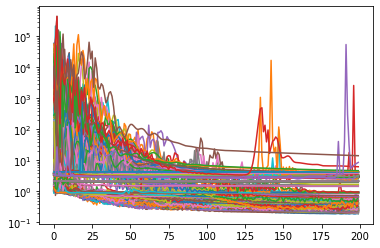

In [14]:
[plt.plot(res['val_loss_history']) for res in hpres1]
plt.yscale('log')

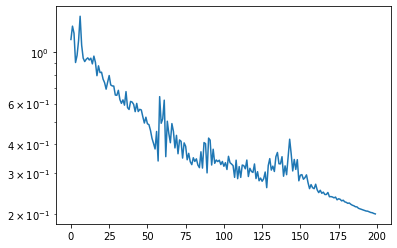

In [38]:
plt.plot(hpres1[4]['val_loss_history'])
plt.yscale('log')

In [19]:
model1 = t.load('runs/act_inh_run1/model')

In [76]:
t.load('runs/act_inh_run1/sr')

FileNotFoundError: [Errno 2] No such file or directory: 'runs/act_inh_run1/sr'

In [26]:
model1.node_features

3

In [27]:
act_inh_gn_simple.node_features

3

Stats for 20 steps for node features:
Greatest relative difference: 1975.1457214355469%
Average relative difference: 170.7886791229248%
Smallest relative difference: 100.00886917114258%
Greatest absolute difference: 2.173734188079834
Average absolute difference: 0.14923756662756205
Smallest absolute difference: 7.551908493041992e-05%


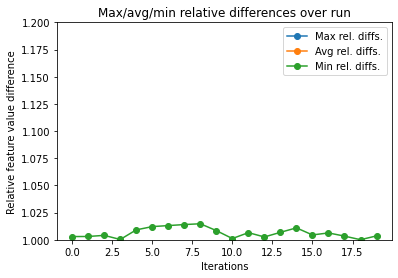

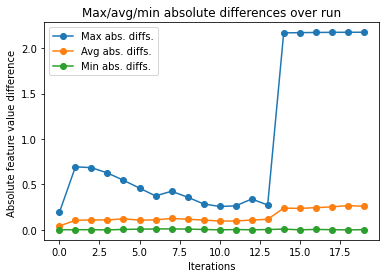

The model being tested finished the run outputting this graph:


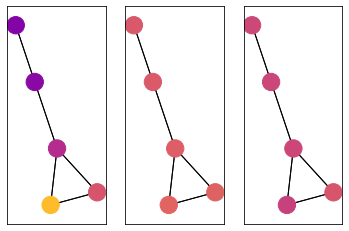

tensor([[0.5477, 0.5921, 0.5477],
        [0.8521, 0.5994, 0.4828],
        [0.4079, 0.5814, 0.5010],
        [0.2842, 0.5660, 0.4992],
        [0.2637, 0.5619, 0.5043]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


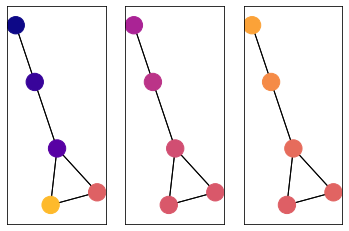

tensor([[ 0.5875,  0.5616,  0.5983],
        [ 0.8491,  0.5613,  0.5858],
        [ 0.1528,  0.5252,  0.6259],
        [ 0.0803,  0.4355,  0.7189],
        [-1.9101,  0.3751,  0.7885]])


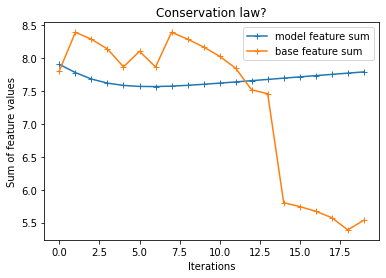

(Data(x=[5, 3], edge_index=[2, 10]), Data(x=[5, 3], edge_index=[2, 10]))

In [71]:
model_compare(hpres1[1]['model'], act_inh_gn_simple)

In [86]:
srm = hpres[1]['model']

In [87]:
type(srm)

gninvert.nn.GeneralLinearFullNet

In [88]:
sr = find_rules_for_model()

TypeError: find_rules_for_model() missing 1 required positional argument: 'model'

In [95]:
os.listdir("runs/test_diff_9")

['model', 'sr', 'hpsearch']

In [96]:
srm2 = t.load("runs/test_diff_9/model")

In [72]:
hpres1[1]

{'settings': {'loss_func': L1Loss(),
  'optimizer': 'adam',
  'regularization_coefficient': 1e-05,
  'regularization_norm': 1,
  'starting_lr': 0.1,
  'lr_scheduler_dec_factor': 0.2,
  'lr_scheduler_patience': 25,
  'lr_scheduler_cooldown': 1,
  'batch_size': 8,
  'adam_weight_decay': 1e-06,
  'epochs': 200,
  1: 3,
  2: 2,
  3: [36, 36],
  4: torch.nn.modules.activation.GELU,
  5: False},
 'model': GNN_full(),
 'score': None,
 'val_loss_history': [2.1489832401275635,
  1.34486722946167,
  9.42315673828125,
  6.653585910797119,
  2.717801094055176,
  0.9520875215530396,
  1.7972666025161743,
  1.9053783416748047,
  1.9104926586151123,
  1.7284307479858398,
  1.289451003074646,
  1.1064786911010742,
  1.0304336547851562,
  1.0422486066818237,
  0.9873992204666138,
  0.8576643466949463,
  0.8603583574295044,
  0.8461888432502747,
  0.8130494356155396,
  0.7360072135925293,
  0.7472652196884155,
  0.6660051345825195,
  0.6775460243225098,
  0.6215906739234924,
  0.5973740816116333,
  0.61